In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-Batch-17/main/Day%2022%20Clustering/data/MallCustomers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <a list of 10 Patch objects>)

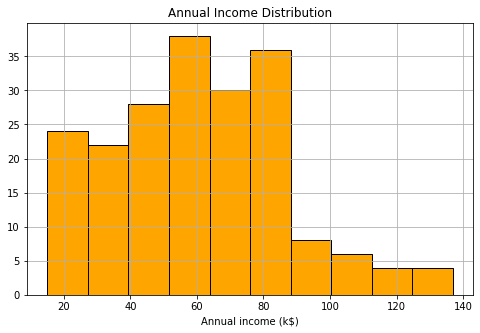

In [6]:
plt.figure(figsize = (8,5))
plt.title("Annual Income Distribution")
plt.xlabel("Annual income (k$)")
plt.grid(True)
plt.hist(df['Annual Income (k$)'],color = 'orange',edgecolor = 'k')

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

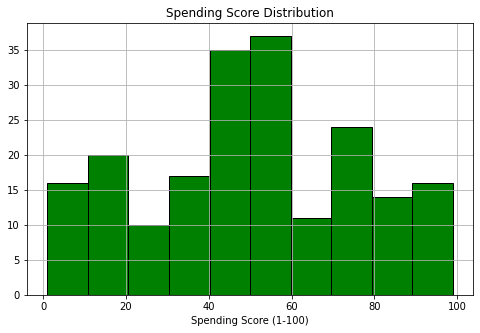

In [7]:
plt.figure(figsize = (8,5))
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score (1-100)")
plt.grid(True)
plt.hist(df['Spending Score (1-100)'],color = 'green',edgecolor = 'k')

<function matplotlib.pyplot.show>

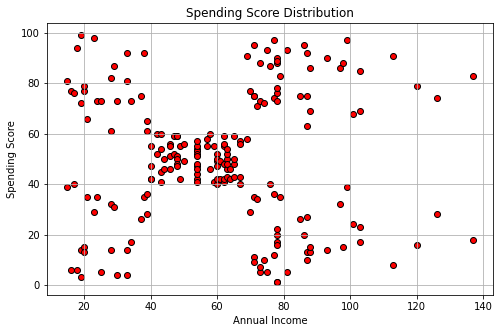

In [9]:
plt.figure(figsize = (8,5))
plt.title("Spending Score Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color = 'red',edgecolor = 'k')
plt.show

<function matplotlib.pyplot.show>

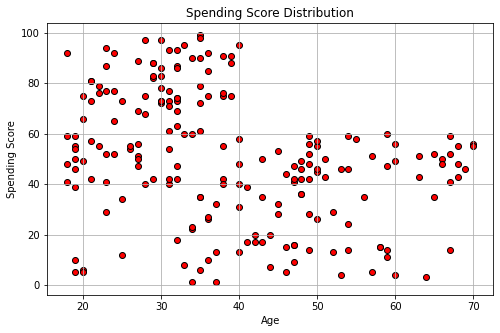

In [10]:
plt.figure(figsize = (8,5))
plt.title("Spending Score Distribution")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color = 'red',edgecolor = 'k')
plt.show

In [11]:
X = df.iloc[:,[3,4]].values

In [12]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

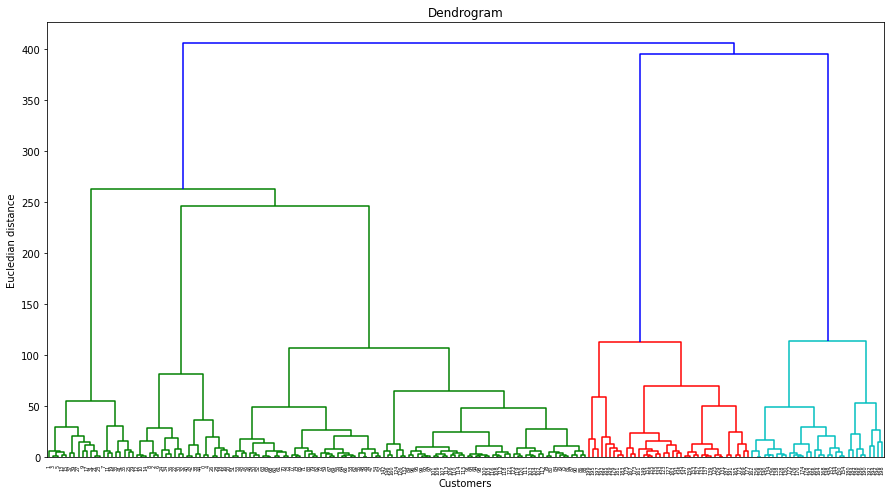

In [17]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,8))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distance")

dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.show()

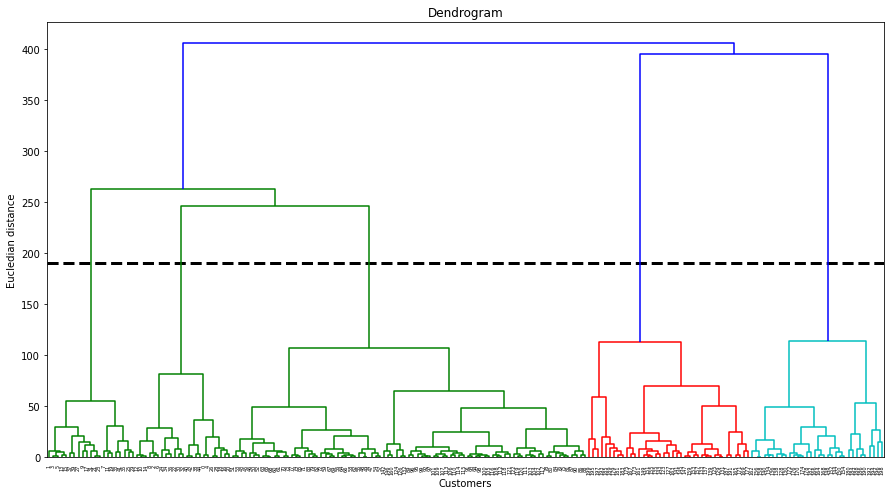

In [18]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,8))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.hlines(y = 190, xmin = 0,xmax = 2000,lw =3,linestyle = '--')
plt.ylabel("Eucledian distance")

dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean',linkage = 'ward')
y_hc = hc.fit_predict(X)

In [23]:
X[y_hc == 0,1]

array([11,  9,  5,  7, 10,  5, 12, 22, 17, 20, 16,  1,  1,  5, 26, 20, 27,
       13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28, 18])

In [24]:
X[y_hc == 0,0]

array([ 71,  71,  73,  73,  74,  75,  77,  78,  78,  78,  78,  78,  78,
        81,  85,  86,  87,  87,  87,  88,  88,  93,  97,  98,  99, 101,
       103, 103, 113, 120, 126, 137])

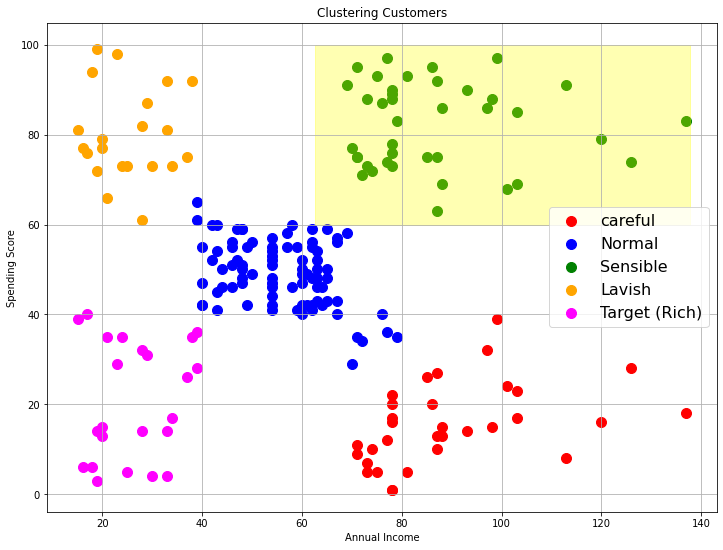

In [33]:
plt.figure(figsize = (12,9))
plt.scatter(X[y_hc == 0,0],X[y_hc == 0,1],s =100,c = 'red',label ='careful')
plt.scatter(X[y_hc == 1,0],X[y_hc == 1,1],s=100,c = 'blue',label ='Normal')
plt.scatter(X[y_hc == 2,0],X[y_hc == 2,1],s=100,c = 'green',label ='Sensible')
plt.scatter(X[y_hc == 3,0],X[y_hc == 3,1],s=100,c = 'orange',label ='Lavish')
plt.scatter(X[y_hc == 4,0],X[y_hc == 4,1],s=100,c = 'magenta',label = 'Target (Rich)')
plt.title("Clustering Customers")
plt.xlabel("Annual Income")
plt.grid(True)
plt.ylabel("Spending Score")
plt.legend(fontsize = 16)
plt.axhspan(ymin = 60,ymax=100,xmin = 0.40,xmax = 0.96,alpha = 0.3,color = 'yellow')
plt.show()

# Elbow BASED KMeans++ Validation
# Implementation and Break till 9:55am IST